In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, recall_score, matthews_corrcoef, make_scorer

In [ ]:
import gdown
import pandas as pd

file_id = '1nW2d5VHQrT59J1lV2KLnwrLM54yXEilz'
output_file = 'Threats.csv'

download_url = f'https://drive.google.com/uc?id={file_id}'

gdown.download(download_url, output_file, quiet=False)
data = pd.read_csv(output_file, sep=',')
data = pd.read_csv(output_file, sep=',')

Downloading...
From: https://drive.google.com/uc?id=1nW2d5VHQrT59J1lV2KLnwrLM54yXEilz
To: /content/Threats.csv
100%|██████████| 25.9M/25.9M [00:00<00:00, 52.4MB/s]


In [ ]:
data=data.drop(columns=['Unnamed: 0', 'id'])
data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.012996,tcp,-,FIN,16,18,1540,1644,2539.242797,31,...,1,6,0,0,0,5,7,0,Normal,0
1,0.004119,tcp,-,FIN,12,12,1064,2260,5583.879675,31,...,1,1,0,0,0,3,8,0,Normal,0
2,0.000988,udp,dns,CON,2,2,146,178,3036.437382,31,...,1,2,0,0,0,7,2,0,Normal,0
3,3.415787,tcp,ssh,FIN,230,238,24344,29556,136.718127,31,...,1,1,0,0,0,4,1,0,Normal,0
4,0.193943,tcp,-,FIN,72,74,4238,63618,747.642372,31,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,13,24,0,0,0,24,24,0,Generic,1
135337,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,3,13,0,0,0,3,12,0,Generic,1
135339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,...,14,30,0,0,0,30,30,0,Generic,1


In [ ]:
categorical_cols = ['proto', 'service', 'state', 'attack_cat']
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

In [ ]:
X = data.drop(columns=['label'])
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
dt_classifier = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

In [ ]:
auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

print("Performance Metrics:")
print(f"AUC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Performance Metrics:
AUC: 1.0000
F1 Score: 1.0000
Recall: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000


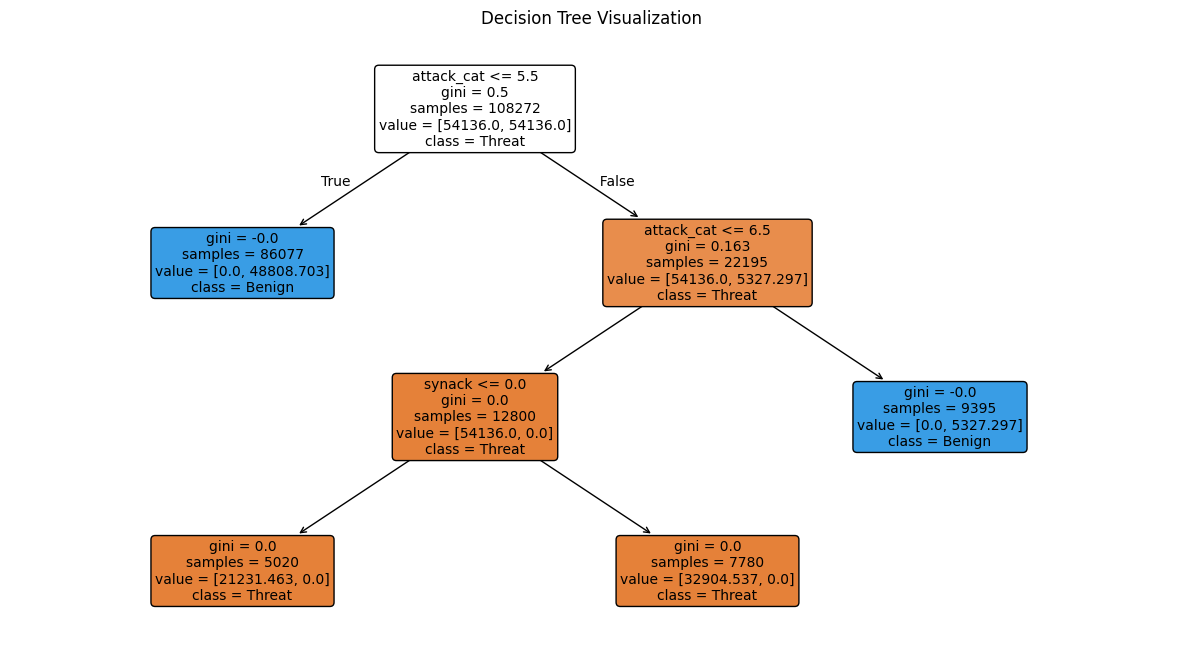

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=["Threat", "Benign"],
    filled=True, rounded=True, fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()